<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA-&amp;-Feature-Engineering" data-toc-modified-id="EDA-&amp;-Feature-Engineering-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA &amp; Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#belongs_to_collection" data-toc-modified-id="belongs_to_collection-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>belongs_to_collection</a></span></li><li><span><a href="#Genres" data-toc-modified-id="Genres-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Genres</a></span><ul class="toc-item"><li><span><a href="#Note-that-I-will-perform-rare-label-encoding-later-after-splitting-training-and-validation-set,-because-it-learns-the-parameters-from-train,-and-apply-to-validation-and-test-set-later." data-toc-modified-id="Note-that-I-will-perform-rare-label-encoding-later-after-splitting-training-and-validation-set,-because-it-learns-the-parameters-from-train,-and-apply-to-validation-and-test-set-later.-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Note that I will perform rare label encoding later after splitting training and validation set, because it learns the parameters from train, and apply to validation and test set later.</a></span></li></ul></li><li><span><a href="#homepage" data-toc-modified-id="homepage-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>homepage</a></span></li><li><span><a href="#original_language" data-toc-modified-id="original_language-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>original_language</a></span></li><li><span><a href="#Drop-unuseful-variables" data-toc-modified-id="Drop-unuseful-variables-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Drop unuseful variables</a></span></li><li><span><a href="#production_companies" data-toc-modified-id="production_companies-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>production_companies</a></span></li></ul></li></ul></div>

# TMDB

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import os
os.getcwd()

'/Users/yejiseoung/Dropbox/My Mac (Yejis-MacBook-Pro.local)/Documents/Projects/TMDB'

In [2]:
import datetime
import lightgbm as lgb
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
stop = set(stopwords.words('english'))

import plotly.graph_objs as go
import plotly.tools as tls
import xgboost as xgb
from sklearn import model_selection
from sklearn.metrics import accuracy_score, mean_squared_error

import json
import ast
#import eli5
#import shap
from catboost import CatBoostRegressor
from urllib.request import urlopen
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.linear_model import LinearRegression


In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [4]:
path = Path('/Users/yejiseoung/Dropbox/My Mac (Yejis-MacBook-Pro.local)/Documents/Projects/TMDB/datasets')

In [5]:
data = pd.read_csv(path/'train.csv')
print(data.shape)
data.head(2)

(3000, 23)


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


In [6]:
data_test = pd.read_csv(path/'test.csv')
data_test.shape

(4398, 22)

Missing values?

In [7]:
missing_vars = [var for var in data.columns if data[var].isnull().sum()>0]

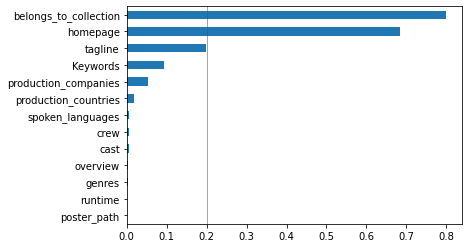

In [8]:
data[missing_vars].isnull().mean().sort_values(ascending=True).plot(kind='barh')
plt.axvline(x=0.2, linewidth=0.5, color='red');

`belongs_to_collection` and `homepage` have a lot of missing values in the variable. Other 11 variables have less than 20% of missing values.

What about test set?

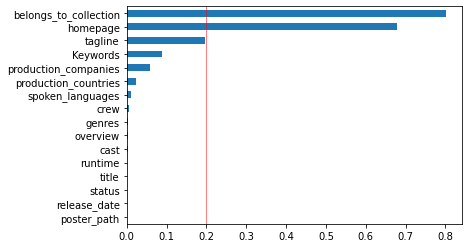

In [9]:
missing_vars_test = [var for var in data_test.columns if data_test[var].isnull().sum()>0]

data_test[missing_vars_test].isnull().mean().sort_values(ascending=True).plot(kind='barh')
plt.axvline(x=0.2, linewidth=0.5, color='red');

In [10]:
len(missing_vars), len(missing_vars_test)

(13, 16)

In [11]:
set(missing_vars_test).difference(set(missing_vars))

{'release_date', 'status', 'title'}

Test set has more variables which have missing values: release_date, status, title

## EDA & Feature Engineering

In this section, I explore the dataset. 

We have 8 variables which have dictionary values in column: 'belongs_to_collection', 'genres','production_companies','production_countries', 'spoken_languages', 'Keywords','cast', 'crew'.

So, I will figure out if we can extract meaningful information from those variables. Also, if I need to perform feature engineering to extract useful features, I will do here. 

### belongs_to_collection

In [12]:
def data_dict(data):
    """Function to analyze dictionary values in columns"""
    for col in dict_columns:
        data[col] = data[col].apply(lambda x: {} if pd.isnull(x) else ast.literal_eval(x))
    return data
    
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
               'production_countries', 'spoken_languages', 'Keywords',
               'cast', 'crew']

df_train = data_dict(data)
df_test = data_dict(data_test)

In [13]:
df_train['belongs_to_collection'].apply(lambda x: len(x) if x != np.nan else 0).value_counts()

0    2396
1     604
Name: belongs_to_collection, dtype: int64

`belongs_to_collection` has more than 80% of missing values. 2396 are missing and 604 contain information including id, name, poster_path, backdrop_path. 

I think only `name` information which shows whether the movie belongs to collection is useful. 

In [14]:
for i, e in enumerate(data['belongs_to_collection'][:5]):
    print(i, e)

0 [{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]
1 [{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}]
2 {}
3 {}
4 {}


Therefore, I will create `is_collection` feature which indicates whether the movie belongs to the collection or not, and drop the original `belongs_to_collection` feature

In [15]:
df_train['is_collection'] = df_train['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)
df_test['is_collection'] = df_test['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)

# drop belongs_to_collection
df_train.drop('belongs_to_collection', axis=1, inplace=True)
df_test.drop('belongs_to_collection', axis=1, inplace=True)

In [16]:
df_train.head(2)

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,is_collection
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1


In [17]:
# check if is_collection has missing value
df_train['is_collection'].isnull().mean()

0.0

In [18]:
df_test['is_collection'].isnull().mean()

0.0

### Genres

In [19]:
for i, e in enumerate(df_train['genres'][:5]):
    print(i, e)

0 [{'id': 35, 'name': 'Comedy'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
2 [{'id': 18, 'name': 'Drama'}]
3 [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
4 [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]


We can see that some movies have multiple genres. 

Let's figure out how many genres the movie has?

In [20]:
df_train['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()

2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genres, dtype: int64

In [22]:
df_train['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts() / len(df_train)

2    0.324000
3    0.300000
1    0.197667
4    0.131000
5    0.037000
6    0.007000
0    0.002333
7    0.001000
Name: genres, dtype: float64

We can consider more then 5 genres are rare label, because they have less than 5%. 

what about test?

In [21]:
df_test['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()

2    1407
3    1308
1     895
4     574
5     169
6      27
0      16
8       1
7       1
Name: genres, dtype: int64

In [23]:
df_test['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts() / len(df_train)

2    0.469000
3    0.436000
1    0.298333
4    0.191333
5    0.056333
6    0.009000
0    0.005333
8    0.000333
7    0.000333
Name: genres, dtype: float64

Rare values are categories within a categorical variable that are present only in a small percentage of the observations. I consider any value below 5% can be a rare label. 

So, as we can see above, more than 5 genres can be rare labels.

#### Note that I will perform rare label encoding later after splitting training and validation set, because it learns the parameters from train, and apply to validation and test set later. 

I will perform the following steps: 

    1) Extract the number of genres, `num_genres` from `genres`
    2) Make `num_genres` a categorical variable. 
    3) Make 0 value to missing value
    4) Drop the original `genres` column from both df_train and df_test dataset
   

In [27]:
# 1) Extract the num_genres from genres 
df_train['num_genres'] = df_train['genres'].apply(lambda x: len(x) if x != {} else 0)
df_test['num_genres'] = df_test['genres'].apply(lambda x: len(x) if x != {} else 0)

df_train.head(5)

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,is_collection,num_genres
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,1
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,4
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,1
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,{},"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,2
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,{},"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,{},"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,2


In [32]:
# 2) Make `num_genres` a categorical variable. 
df_train['num_genres'] = df_train['num_genres'].astype('O')
df_test['num_genres'] = df_test['num_genres'].astype('O')

In [40]:
# 3) Make 0 value to missing values
df_train['num_genres'] = df_train['num_genres'].replace(0, 'missing')
df_test['num_genres'] = df_test['num_genres'].replace(0, 'missing')

In [35]:
# 4) drop the original column from df_train and df_test
df_train.drop('genres', axis=1, inplace=True)
df_test.drop('genres', axis=1, inplace=True)

### homepage

We found above, there are a lot of missing values in homepage variable both in training and test set. It might be better to create `is_homepage` column which indicates whether it has homepage or not. 


In [43]:
df_train['homepage'].isnull().mean()

0.6846666666666666

In [86]:
df_train['is_homepage'] = np.where(df_train['homepage'].isnull(), 0, 1)
df_test['is_homepage'] = np.where(df_test['homepage'].isnull(), 0, 1)

In [87]:
# drop original homepage column
df_train.drop('homepage', axis=1, inplace=True)
df_test.drop('homepage', axis=1, inplace=True)

In [89]:
df_train.head(2)

,id,budget,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,is_collection,num_genres,all_genres,is_homepage
0,1,14000000,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,1,Comedy,0
1,2,40000000,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,4,Comedy Drama Family Romance,0


### original_language

`Original_langauge` has high cardinality. highly cardinal variables tend to have many infrequent or rare categories

We found that the majority of movies' original language is English. So, I will create a variable which indicates whether the movie is in English or not.

<AxesSubplot:>

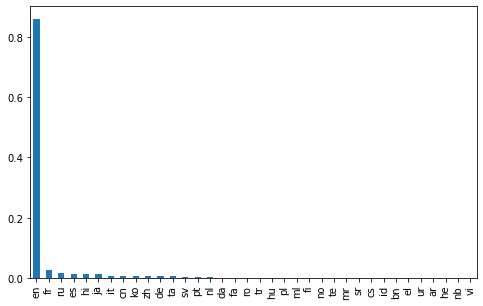

In [100]:
(df_train['original_language'].value_counts() /len(df_train)).plot(kind='bar', figsize=(8,5))

<AxesSubplot:>

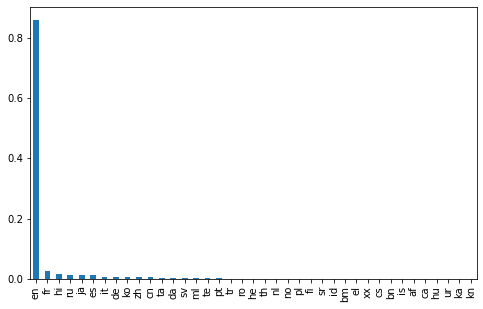

In [101]:
(df_test['original_language'].value_counts() / len(df_test)).plot(kind='bar', figsize=(8,5))

In [102]:
# create is_English variable
df_train['is_English'] = np.where((df_train['original_language'] == 'en'), 1, 0)
df_test['is_English'] = np.where((df_test['original_language'] == 'en'), 1, 0)

In [106]:
# drop original language column
df_train.drop('original_language', axis=1, inplace=True)
df_test.drop('original_language', axis=1, inplace=True)

### Drop unuseful variables

I think `original_title`, `overview`, `poster_path`, `tagline` are useful to keep when building a machine learning model, so I will drop those variables

In [107]:
df_train.drop(['original_title', 'overview', 'poster_path', 'tagline'], axis=1, inplace=True)
df_test.drop(['original_title', 'overview', 'poster_path', 'tagline'], axis=1, inplace=True)

### production_companies

In [108]:
for i, e in enumerate(df_train['production_companies'][:5]):
    print(i, e)

0 [{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]
1 [{'name': 'Walt Disney Pictures', 'id': 2}]
2 [{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]
3 {}
4 {}


In [112]:
df_train['production_companies'].apply(lambda x: len(x) if x != {} else 0).value_counts() 

1     775
2     734
3     582
4     312
5     166
0     156
6     118
7      62
8      42
9      29
10      7
11      7
12      3
16      2
15      2
14      1
13      1
17      1
Name: production_companies, dtype: int64